<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time
from collections import Counter
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import *   
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

import os
import sys
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pretty display for notebooks
%matplotlib inline

In [ ]:
mydata = pd.read_csv('/content/annual_generation_state.csv')
mydata.head(5)

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8823445
1,2002,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8742928
2,2003,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8535065
3,2004,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8488210
4,2001,US-TOTAL,"Electric Generators, Electric Utilities",Pumped Storage,-7704482


In [ ]:
mydata.shape

(55886, 5)

In [ ]:
mydata.head(50)


,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8823445
1,2002,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8742928
2,2003,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8535065
3,2004,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8488210
4,2001,US-TOTAL,"Electric Generators, Electric Utilities",Pumped Storage,-7704482
5,2003,US-TOTAL,"Electric Generators, Electric Utilities",Pumped Storage,-7531885
6,2004,US-TOTAL,"Electric Generators, Electric Utilities",Pumped Storage,-7526206
7,2002,US-TOTAL,"Electric Generators, Electric Utilities",Pumped Storage,-7433807
8,2007,US-TOTAL,Total Electric Power Industry,Pumped Storage,-6896352
9,2016,US-Total,Total Electric Power Industry,Pumped Storage,-6686127


Convert object data type into int64

In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55886 entries, 0 to 55885
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        55886 non-null  int64 
 1   STATE                       55886 non-null  object
 2   TYPE OF PRODUCER            55886 non-null  object
 3   ENERGY SOURCE               55886 non-null  object
 4   GENERATION (Megawatthours)  55886 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB
None


Rename the columns names

In [ ]:
mydata.columns = ['YEAR','STATE','PRODUCER','ENERGY','GENERATION']
print(mydata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55886 entries, 0 to 55885
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        55886 non-null  int64 
 1   STATE       55886 non-null  object
 2   PRODUCER    55886 non-null  object
 3   ENERGY      55886 non-null  object
 4   GENERATION  55886 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB
None


Generates descriptive statistics

In [ ]:
mydata.describe()

,YEAR,GENERATION
count,55886.000000,5.588600e+04
mean,2006.070733,1.686122e+07
std,8.877047,1.305614e+08
min,1990.000000,-8.823445e+06
25%,1999.000000,2.623500e+04
50%,2007.000000,3.230235e+05
75%,2014.000000,3.388917e+06
max,2020.000000,4.180988e+09


There are 55,886 Instances.

The average of generation power is 16'861,218.55

The standard deviation is unusually large, the max value is 4,180'987,703


Print Instances and Atributes in our dataset.

In [ ]:
mydata.shape

(55886, 5)

# Data Clean

Lost data can happen once no data is given for some items or for an entire component. Missing data is a extremely huge problem in a real-life situations.

In order to find missing values we used isna() function and sum to count the NaN values

In [ ]:
mydata.isna().sum() 

YEAR          0
STATE         0
PRODUCER      0
ENERGY        0
GENERATION    0
dtype: int64

In [ ]:
mydata['YEAR'].value_counts()

2020    2129
2019    2124
2018    2114
2017    2095
2016    2074
2014    2057
2015    2048
2013    2020
2012    1987
2011    1949
2010    1933
2009    1891
2008    1874
2007    1825
2006    1812
2005    1799
2004    1796
2003    1783
2002    1775
2001    1713
2000    1655
1999    1612
1998    1607
1997    1590
1996    1574
1995    1564
1994    1543
1993    1521
1992    1503
1991    1473
1990    1446
Name: YEAR, dtype: int64

In [ ]:
mydata['STATE'].value_counts()

CA          1813
MI          1592
PA          1525
NY          1495
US-TOTAL    1460
NC          1401
WI          1386
VA          1373
TX          1366
WA          1356
FL          1347
MN          1345
IL          1319
MA          1315
OH          1267
NJ          1235
MD          1203
ME          1198
SC          1194
GA          1160
CT          1152
TN          1141
CO          1138
IA          1120
OR          1087
IN          1082
MO          1068
LA          1051
AR          1035
UT          1018
HI          1017
AL           995
OK           994
NH           965
AZ           961
WV           929
ID           857
MT           828
NV           824
AK           817
MS           791
NE           785
NM           768
VT           711
WY           706
DE           694
ND           683
KS           667
RI           665
US-Total     659
KY           630
SD           505
DC           190
               3
Name: STATE, dtype: int64

In [ ]:
mydata['PRODUCER'].value_counts()

Total Electric Power Industry                       15350
Electric Generators, Electric Utilities             11013
Combined Heat and Power, Industrial Power            9308
Electric Generators, Independent Power Producers     8943
Combined Heat and Power, Commercial Power            5908
Combined Heat and Power, Electric Power              5364
Name: PRODUCER, dtype: int64

In [ ]:
mydata['ENERGY'].value_counts()

Total                             8628
Natural Gas                       7717
Petroleum                         7421
Coal                              5693
Other Biomass                     5162
Hydroelectric Conventional        4703
Wood and Wood Derived Fuels       3554
Other                             3298
Wind                              2238
Other Gases                       2176
Nuclear                           2056
Solar Thermal and Photovoltaic    1542
Pumped Storage                    1241
Geothermal                         457
Name: ENERGY, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

Function to calculate IOR for each numerical attribute and show skewness

In [ ]:
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return 

Data Visualization and Analysis
KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous

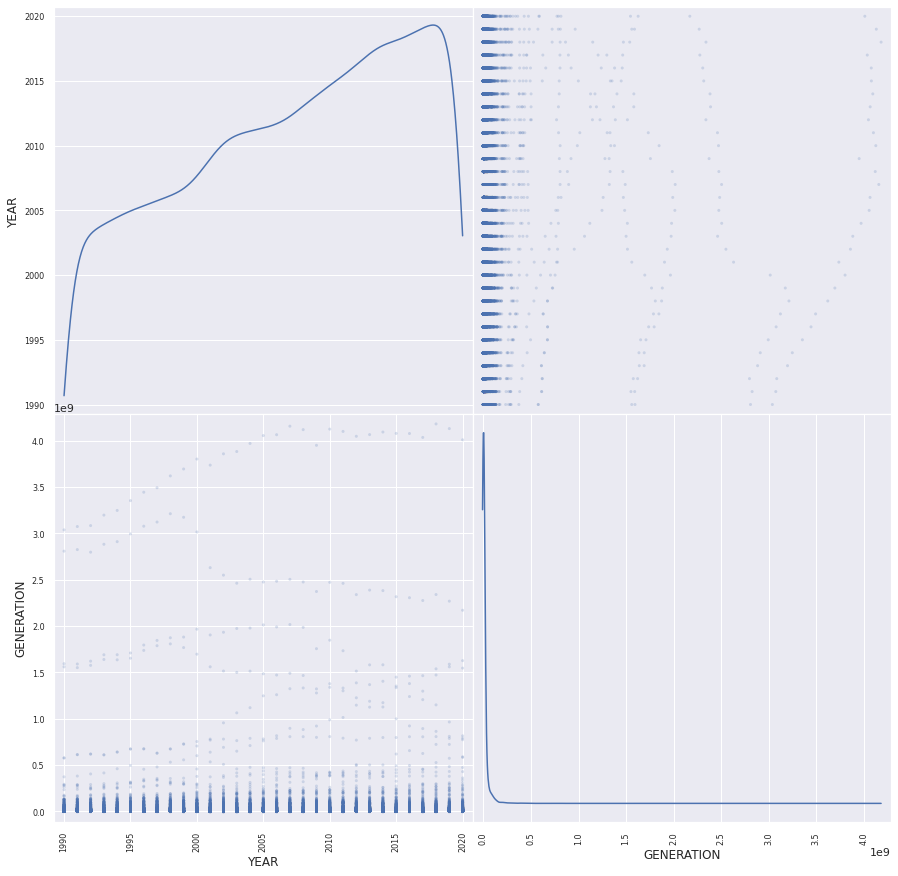

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(mydata, alpha=0.2, figsize=(15,15), diagonal= 'kde' )
plt.show()


Relations between the numerical columns

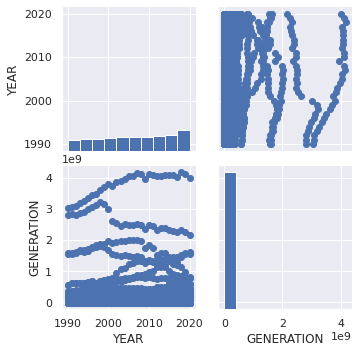

In [ ]:
g = sb.PairGrid(data = mydata)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Function definitions
Function for checking for outliers in the numeric value columns

In [ ]:
def outlier(var):
    high = np.mean(var) + 2*np.std(var)
    low = np.mean(var) - 2*np.std(var)
    outliers = (var >= high) | (var <= low)
    return outliers


Function to bin numerical columns

In [ ]:
def bins(x, n): 
    BinWidth = (max(x) - min(x))/n
    bound1 = float('-inf')
    bound2 = min(x) + 1 * BinWidth
    bound3 = min(x) + 2 * BinWidth
    bound4 = float('inf')
    Binned = np.array([" "]*len(x)) 
    Binned[(bound1 < x) & (x <= bound2)] = 1 # Low
    Binned[(bound2 < x) & (x <= bound3)] = 2 # Med
    Binned[(bound3 < x) & (x  < bound4)] = 3 # High
    return Binned

Function for z-standardization of a numerical column

In [ ]:
def norm(col): 
    x = np.array(col).astype(float)
    X = pd.DataFrame(x) 
    y = StandardScaler().fit(X).transform(X)
    return y

Remove/replace outliers for the numerical columns.
Replace outliers with median values for the numerical column, 'GENERATION'.

In [ ]:
outliers = outlier(mydata['GENERATION'])
mydata.loc[outliers, 'GENERATION'] = np.median(mydata.loc[:,"GENERATION"])

print(mydata)

       YEAR     STATE                                 PRODUCER  \
0      2001  US-TOTAL            Total Electric Power Industry   
1      2002  US-TOTAL            Total Electric Power Industry   
2      2003  US-TOTAL            Total Electric Power Industry   
3      2004  US-TOTAL            Total Electric Power Industry   
4      2001  US-TOTAL  Electric Generators, Electric Utilities   
...     ...       ...                                      ...   
55881  2008  US-TOTAL            Total Electric Power Industry   
55882  2010  US-TOTAL            Total Electric Power Industry   
55883  2019  US-Total            Total Electric Power Industry   
55884  2007  US-TOTAL            Total Electric Power Industry   
55885  2018  US-Total            Total Electric Power Industry   

               ENERGY  GENERATION  
0      Pumped Storage  -8823445.0  
1      Pumped Storage  -8742928.0  
2      Pumped Storage  -8535065.0  
3      Pumped Storage  -8488210.0  
4      Pumped Storage  -770

# Data Visualisation and Analysis

Text(0.5, 1.0, 'GENERATION v/s COUNT')

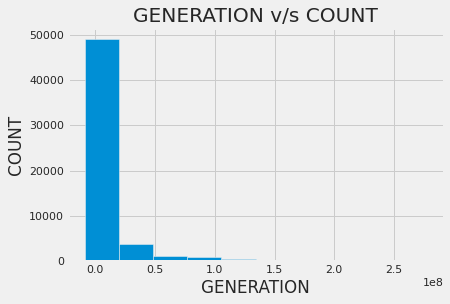

In [ ]:
plt.style.use('fivethirtyeight')
mydata['GENERATION'].hist()
plt.xlabel('GENERATION')
plt.ylabel('COUNT')
plt.title('GENERATION v/s COUNT')

Normalize values for the numerical columns by z-standardization

Normalize the GENERATION column; plot the normalized GENERATION data.

In [ ]:
col = mydata["GENERATION"]
mydata["GENERATION"] = norm(col)
print(mydata)

       YEAR     STATE                                 PRODUCER  \
0      2001  US-TOTAL            Total Electric Power Industry   
1      2002  US-TOTAL            Total Electric Power Industry   
2      2003  US-TOTAL            Total Electric Power Industry   
3      2004  US-TOTAL            Total Electric Power Industry   
4      2001  US-TOTAL  Electric Generators, Electric Utilities   
...     ...       ...                                      ...   
55881  2008  US-TOTAL            Total Electric Power Industry   
55882  2010  US-TOTAL            Total Electric Power Industry   
55883  2019  US-Total            Total Electric Power Industry   
55884  2007  US-TOTAL            Total Electric Power Industry   
55885  2018  US-Total            Total Electric Power Industry   

               ENERGY  GENERATION  
0      Pumped Storage   -0.695133  
1      Pumped Storage   -0.692001  
2      Pumped Storage   -0.683913  
3      Pumped Storage   -0.682090  
4      Pumped Storage   -0.

Spiliting Dataset into training(75%) and test set(25%)

In [ ]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

X_train.shape

(41914, 4)

In [ ]:
print(X_train)

[[1993 'PA' 'Electric Generators, Independent Power Producers'
  'Other Biomass']
 [2003 'AL' 'Combined Heat and Power, Industrial Power' 'Coal']
 [2003 'US-TOTAL' 'Combined Heat and Power, Electric Power' 'Natural Gas']
 ...
 [2010 'SC' 'Combined Heat and Power, Commercial Power' 'Petroleum']
 [2012 'NJ' 'Electric Generators, Independent Power Producers'
  'Petroleum']
 [2005 'CO' 'Electric Generators, Independent Power Producers' 'Wind']]


In [ ]:
X_test.shape

(13972, 4)

In [ ]:
print(X_test)

[[1993 'MT' 'Electric Generators, Independent Power Producers'
  'Hydroelectric Conventional']
 [2006 'NY' 'Combined Heat and Power, Commercial Power' 'Total']
 [2003 'UT' 'Electric Generators, Electric Utilities' 'Geothermal']
 ...
 [2010 'MO' 'Total Electric Power Industry' 'Total']
 [1999 'MI' 'Combined Heat and Power, Industrial Power' 'Total']
 [2017 'DE' 'Total Electric Power Industry' 'Other Biomass']]


In [ ]:
y_test.shape

(13972,)

In [ ]:
print(y_test)

[-0.34931676 -0.32354539 -0.34411323 ...  3.23983445 -0.27876794
 -0.34939104]


In [ ]:
y_train.shape


(41914,)

In [ ]:
print(y_train)

[-0.30704522 -0.34256339  5.33241958 ... -0.35180902 -0.35117771
 -0.32390688]


Applying Machine Learning Algorithm for Classification Problem
Logistic Regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logmodel = LogisticRegression(random_state=1)
#logmodel.fit(X_train,y_train)


ValueError: ignored